# Beginning

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
df = pd.read_csv("data/TM_results.tsv", header=0, sep="\t")
df.loc[:, "gramm_model"] = df['gramm_model'].apply(lambda x: x.split("/")[3])
df.loc[:, "known_model"] = df["known_model"].apply(lambda x: x.split("/")[1])
df.head()

sap host_protein                 gramm_model known_model  TMscore  RMSD
0  Sap10         GCSF  receptor-ligand_model5.pdb   6KX8.pdb1  0.28290  7.42
1  Sap10         GCSF  receptor-ligand_model5.pdb   7D0N.pdb1  0.29466  7.13
2  Sap10         GCSF  receptor-ligand_model5.pdb   3VR1.pdb1  0.28700  7.09
3  Sap10         GCSF  receptor-ligand_model5.pdb   7YE0.pdb2  0.31052  7.36
4  Sap10         GCSF  receptor-ligand_model5.pdb   4I6E.pdb1  0.29032  7.03

In [4]:
print(f"there are {df.shape[0]} rows in the data frame")
print(f"there are {df['known_model'].nunique()} unique PDB structures found")

there are 1966 rows in the data frame
there are 1063 unique PDB structures found


## Filter

In [5]:
fd = df.loc[df['TMscore'] > 0.17].sort_values(by="RMSD", ascending=True)
print(f"there are {fd.shape[0]} rows in the data filtered data frame")
print(f"there are {fd['known_model'].nunique()} unique PDB structures found")

there are 1942 rows in the data filtered data frame
there are 1046 unique PDB structures found


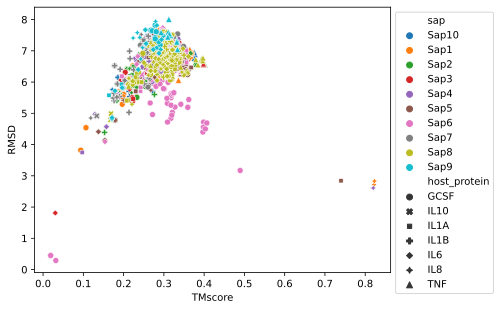

In [6]:
ax = sns.scatterplot(x='TMscore', y='RMSD', hue='sap', data=df, style = "host_protein")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("RMSD_vs_TMscore_NO_LINES.svg")
plt.show()

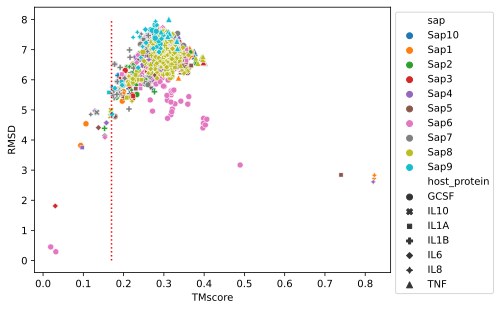

In [7]:
ax = sns.scatterplot(x='TMscore', y='RMSD', hue='sap', data=df, style = "host_protein")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.vlines(0.17, 0, df['RMSD'].max(), linestyles='dotted', colors= "red")
plt.show()

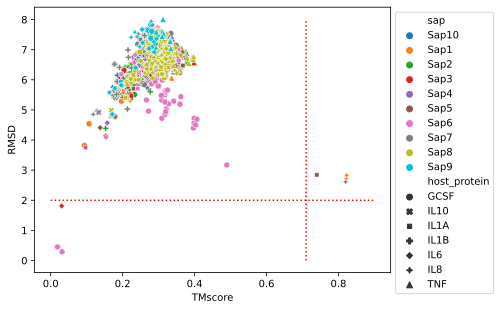

In [8]:
ax = sns.scatterplot(x='TMscore', y='RMSD', hue='sap', data=df, style = "host_protein")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.vlines(0.71, 0, df['RMSD'].max(), linestyles='dotted', colors="red")
ax.hlines(2, 0, 0.9, linestyles='dotted', colors="red")
plt.show()

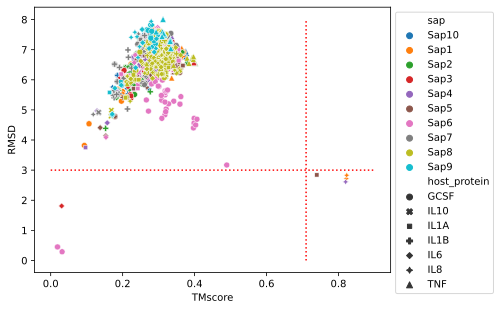

In [9]:
ax = sns.scatterplot(x='TMscore', y='RMSD', hue='sap', data=df, style = "host_protein")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.vlines(0.71, 0, df['RMSD'].max(), linestyles='dotted', colors="red")
ax.hlines(3, 0, 0.9, linestyles='dotted', colors="red")
plt.show()

# Best Models

In [10]:
df.sort_values("TMscore", ascending=False).head(5)

sap host_protein                 gramm_model known_model  TMscore  RMSD
440   Sap1          IL8  receptor-ligand_model5.pdb   4I11.pdb1  0.82290  2.83
439   Sap1          IL8  receptor-ligand_model5.pdb   4I0F.pdb1  0.82206  2.72
1067  Sap4          IL8  receptor-ligand_model5.pdb   3UQW.pdb1  0.81989  2.61
1203  Sap5         IL1A  receptor-ligand_model8.pdb   1T6G.pdb2  0.73990  2.84
1341  Sap6         GCSF  receptor-ligand_model3.pdb   1NF6.pdb9  0.48940  3.17

In [11]:
tm = df['TMscore'] > 0.7
rm = df['RMSD'] < 3

In [12]:
best_models = df.loc[tm & rm]

In [13]:
best_models

sap host_protein                 gramm_model known_model  TMscore  RMSD
439   Sap1          IL8  receptor-ligand_model5.pdb   4I0F.pdb1  0.82206  2.72
440   Sap1          IL8  receptor-ligand_model5.pdb   4I11.pdb1  0.82290  2.83
1067  Sap4          IL8  receptor-ligand_model5.pdb   3UQW.pdb1  0.81989  2.61
1203  Sap5         IL1A  receptor-ligand_model8.pdb   1T6G.pdb2  0.73990  2.84

# Score distributions

In [14]:
saps = ['Sap1', 'Sap2', 'Sap3', 'Sap4', 'Sap5', 'Sap6', 'Sap7', 'Sap8', 'Sap9', 'Sap10']
host_proteins =  ['GCSF', 'IL1A', 'IL1B', 'IL6', 'IL8', 'IL10', 'TNF']

In [15]:
df['TMscore'].describe()

count    1966.000000
mean        0.295581
std         0.048502
min         0.018930
25%         0.277540
50%         0.298530
75%         0.321497
max         0.822900
Name: TMscore, dtype: float64

In [33]:
tms = np.zeros((len(saps), len(host_proteins)))
for i, sap in enumerate(saps):
    this_sap = df['sap'] == sap
    for j, host_prot in enumerate(host_proteins):
        this_host = df['host_protein'] == host_prot
        this_df = df.loc[this_sap & this_host]
        tms[i, j] = this_df['TMscore'].max()

In [36]:
tms = np.nan_to_num(tms)
tm = pd.DataFrame(tms, index=saps, columns=host_proteins)
tm

GCSF     IL1A     IL1B      IL6      IL8     IL10      TNF
Sap1   0.36917  0.35781  0.36600  0.36917  0.82290  0.00000  0.36441
Sap2   0.33961  0.35975  0.31523  0.36618  0.34337  0.32189  0.40228
Sap3   0.33828  0.34528  0.35770  0.35025  0.31902  0.00000  0.39923
Sap4   0.35305  0.34949  0.31895  0.35568  0.81989  0.34638  0.34991
Sap5   0.35885  0.73990  0.35398  0.32873  0.32593  0.36106  0.35591
Sap6   0.48940  0.35640  0.32220  0.33918  0.33887  0.34105  0.34664
Sap7   0.34900  0.27199  0.32231  0.31475  0.30943  0.31766  0.00000
Sap8   0.34036  0.33949  0.35751  0.36114  0.34487  0.34107  0.39718
Sap9   0.29069  0.19519  0.00000  0.29880  0.27945  0.00000  0.33387
Sap10  0.35230  0.34615  0.34770  0.34955  0.34064  0.35495  0.37776

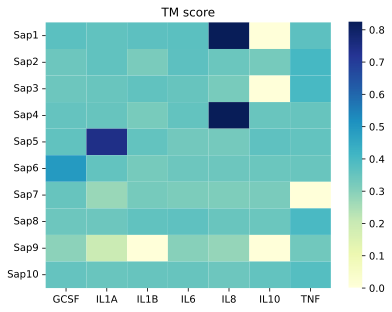

In [44]:
ax = sns.heatmap(tm, cmap="YlGnBu")
ax.set_title("TM score")
plt.show()

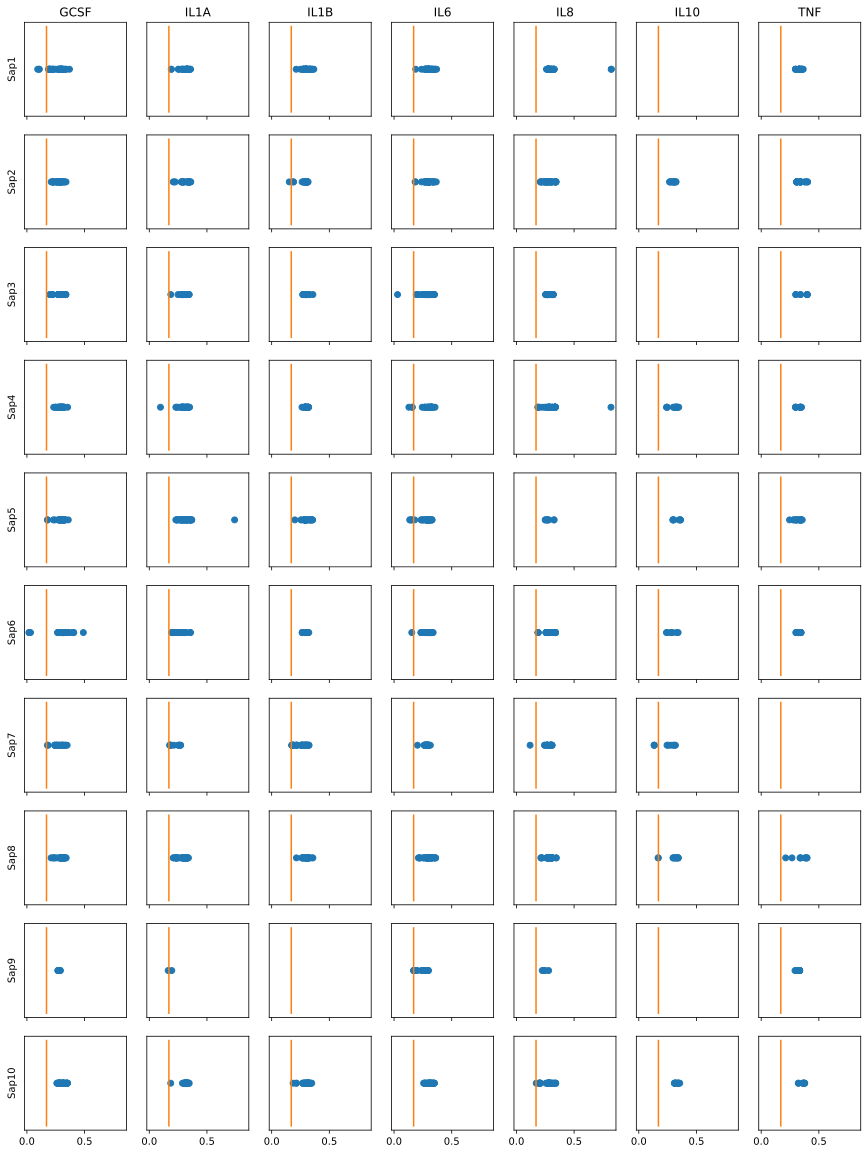

In [83]:
f, axs = plt.subplots(len(saps),len(host_proteins), figsize=(15,20), sharex='all')

for i, sap in enumerate(saps):
    this_sap = df['sap'] == sap
    axs[i,0].set_ylabel(sap)
    for j, host_prot in enumerate(host_proteins):
        this_host = df['host_protein'] == host_prot
        ax = axs[i,j]
        if i == 0:
            ax.set_title(host_prot)
        df_i = df.loc[this_sap & this_host]
        n = df_i.shape[0]
        ax.plot(df_i["TMscore"], [0.5 for _ in range(n)], 'o')
        ax.plot([0.17,0.17], [0,1])
        ax.set_yticks([])

plt.show()

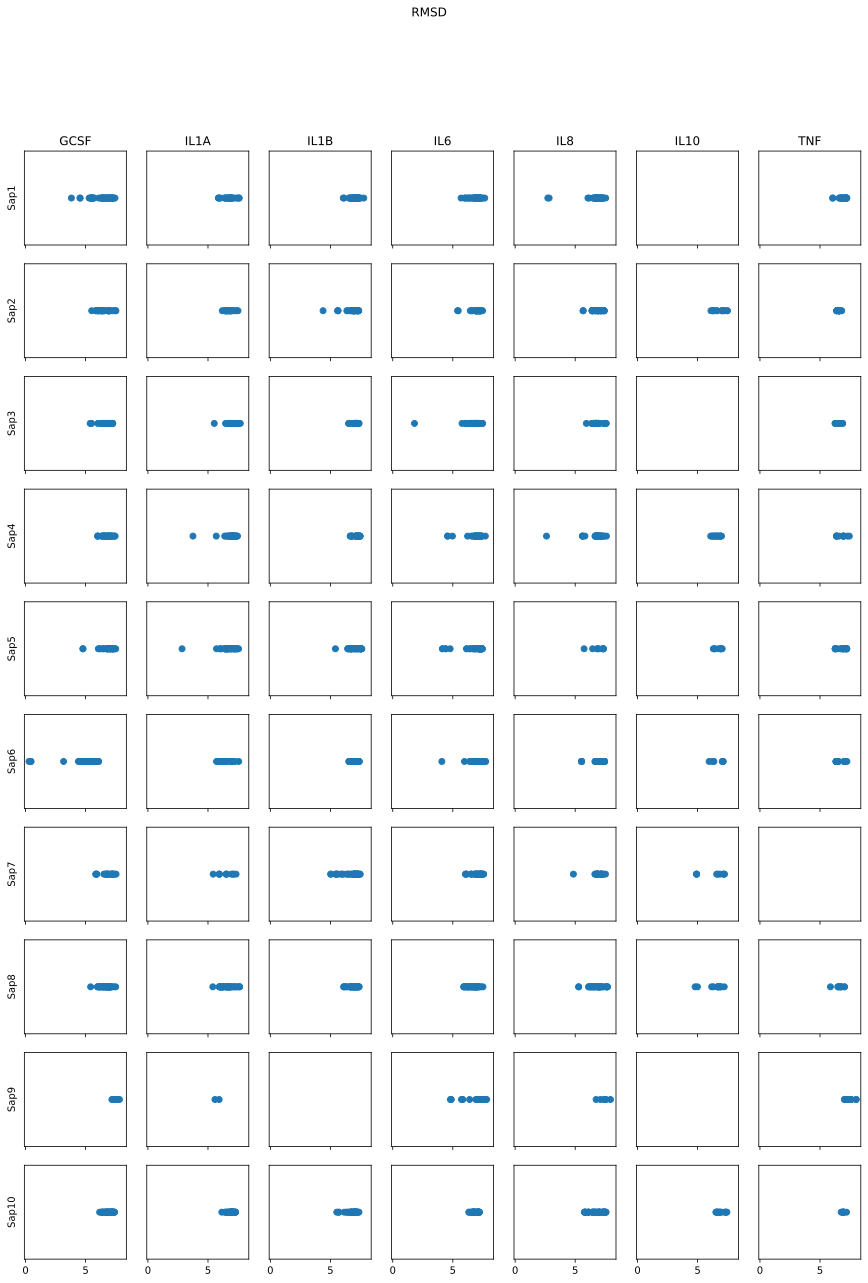

In [98]:
f, axs = plt.subplots(len(saps),len(host_proteins), figsize=(15,20), sharex='all')

for i, sap in enumerate(saps):
    this_sap = df['sap'] == sap
    axs[i,0].set_ylabel(sap)
    for j, host_prot in enumerate(host_proteins):
        this_host = df['host_protein'] == host_prot
        ax = axs[i,j]
        if i == 0:
            ax.set_title(host_prot)
        df_i = df.loc[this_sap & this_host]
        n = df_i.shape[0]
        ax.plot(df_i["RMSD"], [0.5 for _ in range(n)], 'o')
        # ax.plot([0.17,0.17], [0,1])
        ax.set_yticks([])
f.suptitle("RMSD")
plt.show()

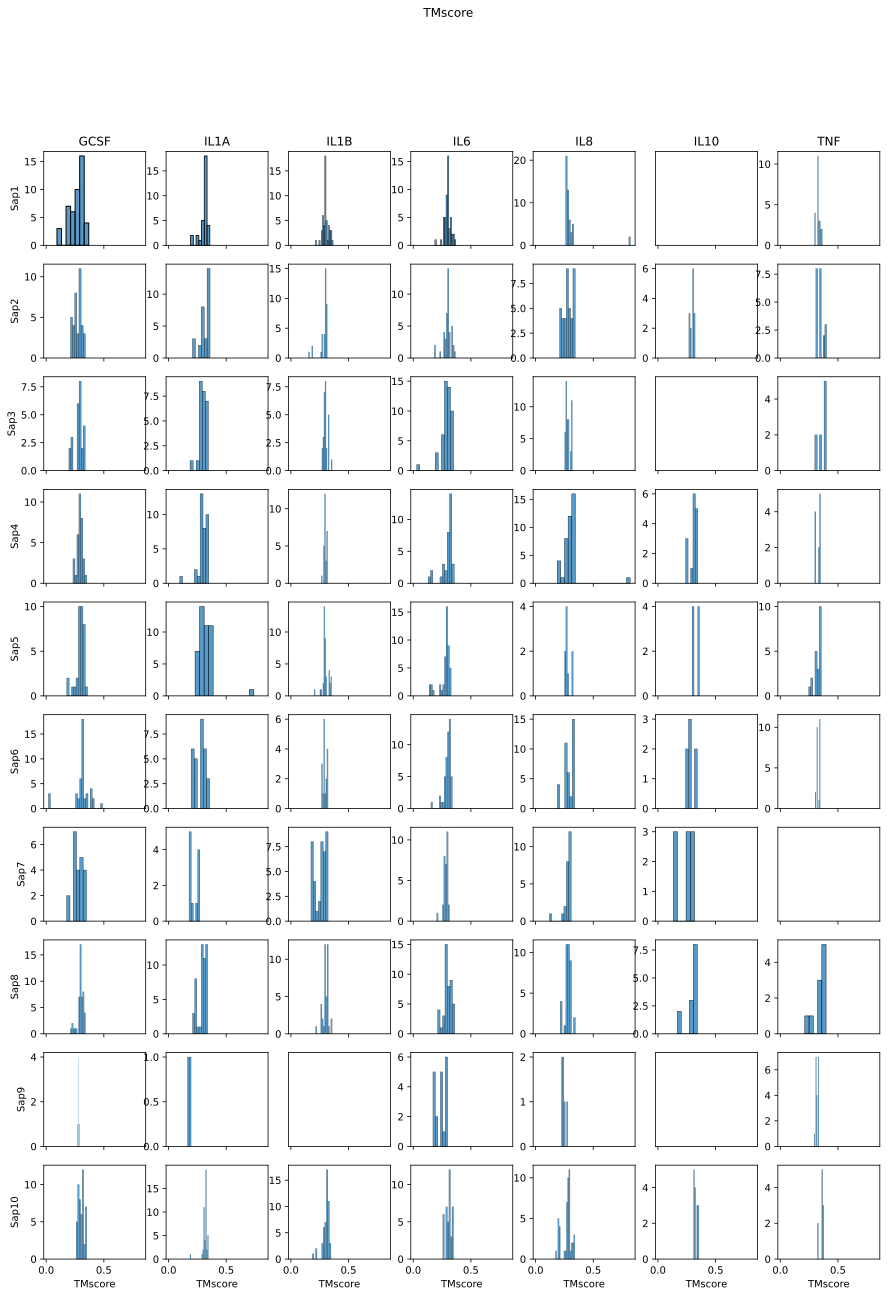

In [99]:
f, axs = plt.subplots(len(saps),len(host_proteins), figsize=(15,20), sharex='all')

for i, sap in enumerate(saps):
    this_sap = df['sap'] == sap
    axs[i,0].set_ylabel(sap)
    for j, host_prot in enumerate(host_proteins):
        this_host = df['host_protein'] == host_prot
        ax = axs[i,j]
        df_i = df.loc[this_sap & this_host]
        sns.histplot(data=df_i, x="TMscore", ax=ax)
        if i == 0:
            ax.set_title(host_prot)
        if j>0:
            ax.set_ylabel("")
        if df_i.shape[0]==0:
            ax.set_yticks([])
f.suptitle("TMscore")
plt.show()

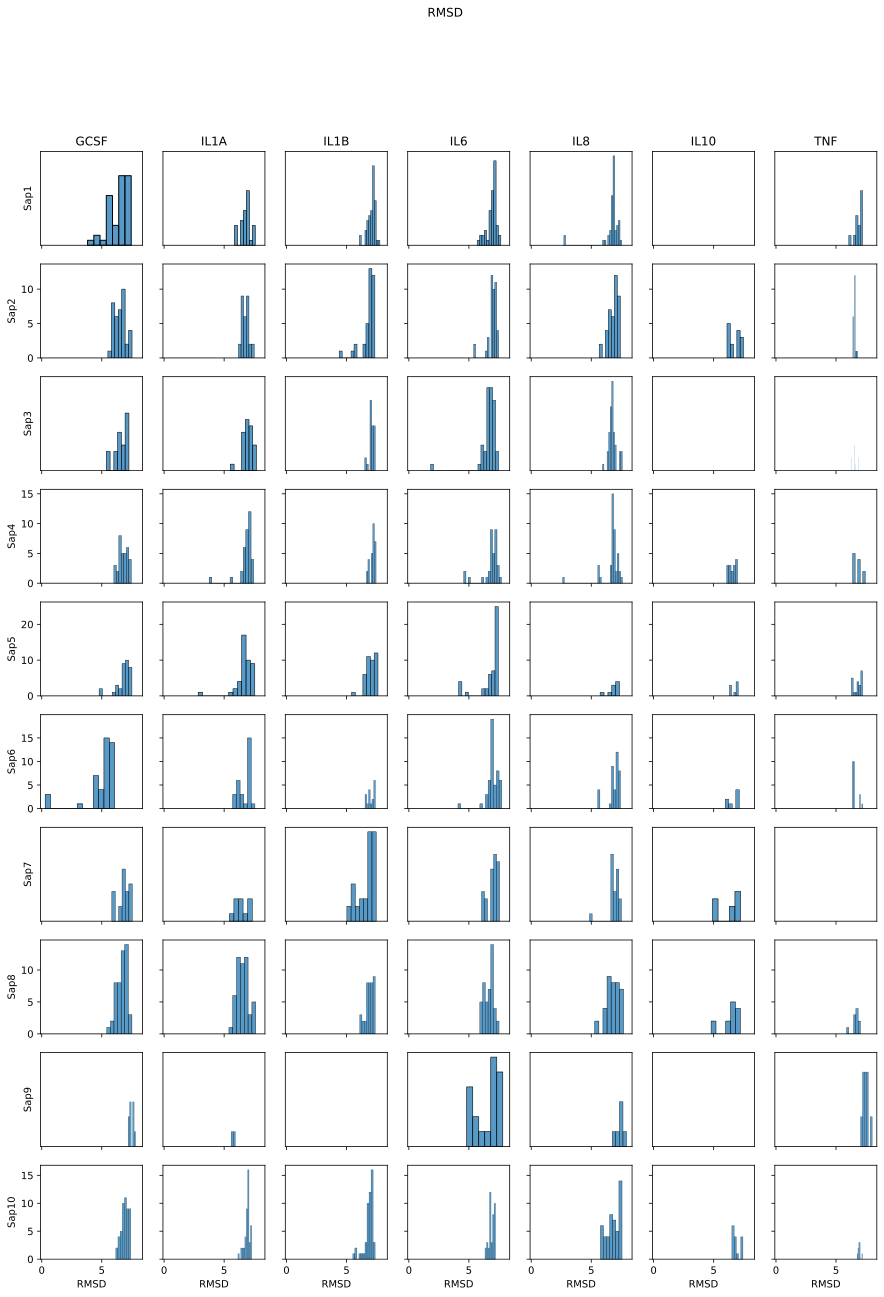

In [100]:
f, axs = plt.subplots(len(saps),len(host_proteins), figsize=(15,20), sharex='all', sharey='row')

for i, sap in enumerate(saps):
    this_sap = df['sap'] == sap
    axs[i,0].set_ylabel(sap)
    for j, host_prot in enumerate(host_proteins):
        this_host = df['host_protein'] == host_prot
        ax = axs[i,j]
        df_i = df.loc[this_sap & this_host]
        sns.histplot(data=df_i, x="RMSD", ax=ax)
        if i == 0:
            ax.set_title(host_prot)
        if j>0:
            ax.set_ylabel("")
        if df_i.shape[0]==0:
            ax.set_yticks([])
f.suptitle("RMSD")
plt.show()

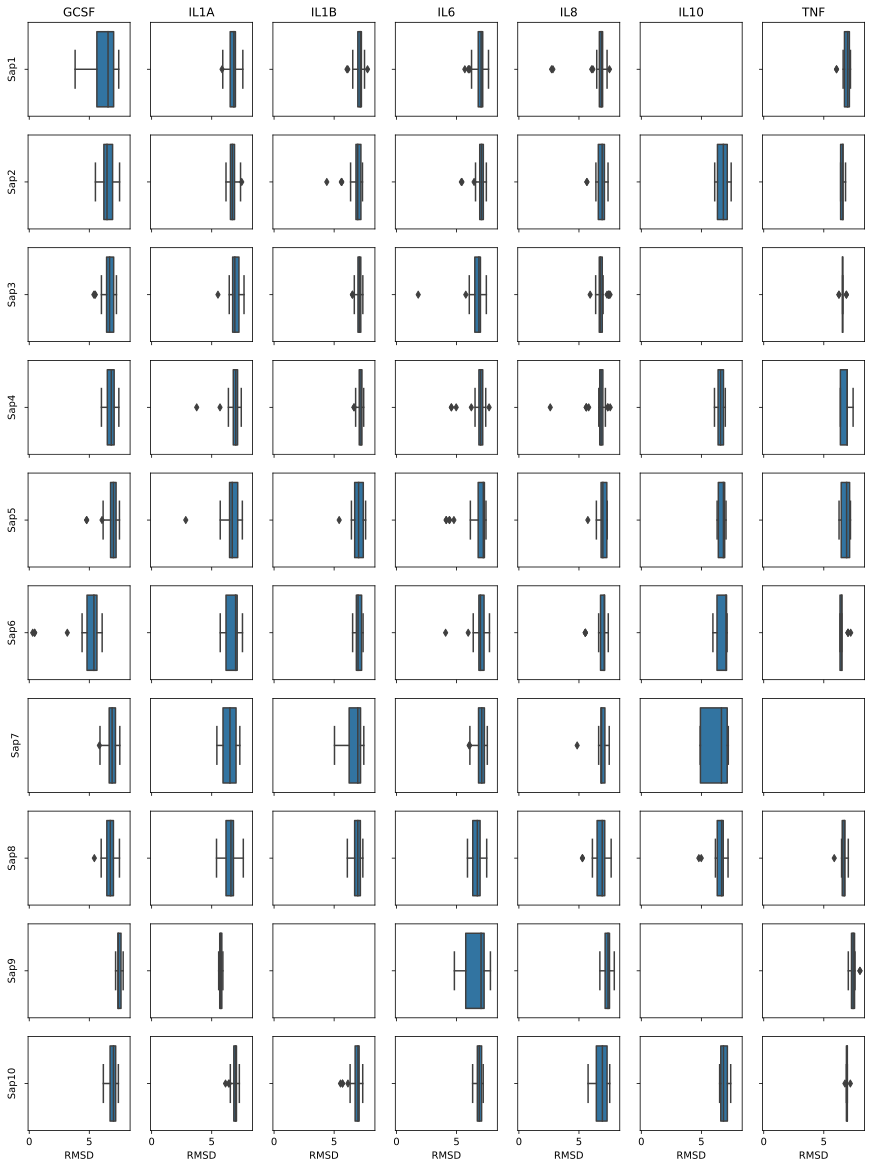

In [91]:
f, axs = plt.subplots(len(saps),len(host_proteins), figsize=(15,20), sharex='all', sharey='row')

for i, sap in enumerate(saps):
    this_sap = df['sap'] == sap
    axs[i,0].set_ylabel(sap)
    for j, host_prot in enumerate(host_proteins):
        this_host = df['host_protein'] == host_prot
        ax = axs[i,j]
        df_i = df.loc[this_sap & this_host]
        sns.boxplot(data=df_i, x="RMSD", ax=ax)
        if i == 0:
            ax.set_title(host_prot)
        if j>0:
            ax.set_ylabel("")
        if i < 9:
            ax.set_xlabel("")
        if df_i.shape[0]==0:
            ax.set_yticks([])

plt.show()